In [1]:
import random
import numpy as np
import torch
import utils
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install gym[atari]
# !pip uninstall ale-py
# !pip install ale-py

In [2]:
from Config.config2_ddqn import config as config2
from Config.config4_ddqn import config as config4

from Config.dueling_config1 import config as dueling_config1
from Config.dueling_config2 import config as dueling_config2

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

mean_rw_history2 = []
mean_rw_history4 = []
mean_rw_history_dueling_pr = []
mean_rw_history_deuling_exp = []

In [4]:
def load2():
    global mean_rw_history2
    checkpoint = torch.load(config2['file_name'] , map_location=torch.device(device))
    mean_rw_history2 = checkpoint['mean_rw_history']

def load4():
    global mean_rw_history4
    checkpoint = torch.load(config4['file_name'] , map_location=torch.device(device))
    mean_rw_history4 = checkpoint['mean_rw_history']

def load_dueling_pr():
    global mean_rw_history_dueling_pr
    checkpoint = torch.load(dueling_config1['file_name'] , map_location=torch.device(device))
    mean_rw_history_dueling_pr = checkpoint['mean_rw_history']

def load_dueling_exp():
    global mean_rw_history_deuling_exp
    checkpoint = torch.load(dueling_config2['file_name'] , map_location=torch.device(device))
    mean_rw_history_deuling_exp = checkpoint['mean_rw_history']


In [5]:
load2()
load4()
load_dueling_pr()
load_dueling_exp()

In [6]:
from scipy.ndimage.filters import gaussian_filter1d

C:\Users\vinik\AppData\Local\Temp\ipykernel_61032\1567020577.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


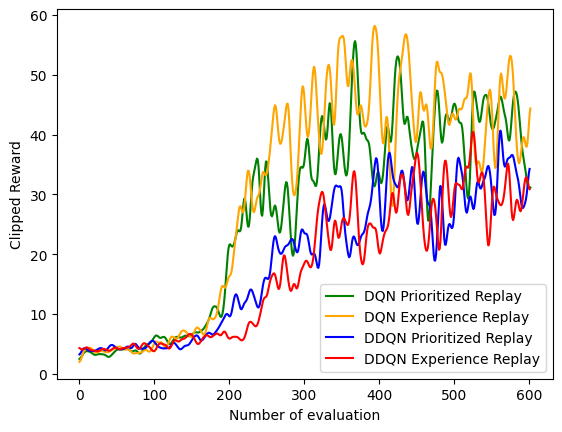

In [16]:
#for smoothing

power2 = gaussian_filter1d(mean_rw_history2, sigma=3)
power4 = gaussian_filter1d(mean_rw_history4, sigma=3)
power_duel_exp = gaussian_filter1d(mean_rw_history_deuling_exp, sigma=3)
power_duel_pr = gaussian_filter1d(mean_rw_history_dueling_pr, sigma=3)

plt.ylabel
plt.xlabel('Number of evaluation')
plt.ylabel('Clipped Reward')

plt.plot(power4, color='green', label='DQN Prioritized Replay')
plt.plot(power2, color='orange', label='DQN Experience Replay')
plt.plot(power_duel_pr, color='blue', label='DDQN Prioritized Replay')
plt.plot(power_duel_exp, color='red', label='DDQN Experience Replay')
plt.legend()

plt.show()